<a href="https://colab.research.google.com/github/kq49539/DATA690-ATMAN/blob/main/assignment_06/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 06

Note:
- For visualization, you should use Plotly Express
- Use use this notebook as your template and follow the instructions
The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

The links to the zip file is:
- https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources (The page containing link to the zip file)

- https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip (The link to download the zip file)

You can upload the zip file there or run !wget command to retrieve it directly, then run !unzip command to extract files.

You can also unzip and upload individual files to Colab.

Your folder structure should look like this in your Colab enviroment:

- assignment_07.ipynb
- raw_data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'



In [1]:
!wget https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip

--2021-10-15 03:19:42--  https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip
Resolving ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)... 15.200.243.39, 15.205.92.235, 2600:1f12:18a:7d01:29c7:6ff5:8ad8:c8f0, ...
Connecting to ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)|15.200.243.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385541173 (368M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data_01192021.zip.3’

CollegeScorecard_Ra 100%[===================>] 367.68M  33.3MB/s    in 12s     

2021-10-15 03:19:54 (30.7 MB/s) - ‘CollegeScorecard_Raw_Data_01192021.zip.3’ saved [385541173/385541173]



In [2]:
!unzip CollegeScorecard_Raw_Data_01192021.zip

Archive:  CollegeScorecard_Raw_Data_01192021.zip
replace Raw Data Files/MERGED2011_12_PP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Raw Data Files/MERGED2011_12_PP.csv  
replace Raw Data Files/MERGED1999_00_PP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Raw Data Files/MERGED1999_00_PP.csv  
replace Raw Data Files/MERGED2006_07_PP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Raw Data Files/MERGED2006_07_PP.csv  
replace Raw Data Files/MERGED2014_15_PP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Raw Data Files/MERGED2014_15_PP.csv  
replace Raw Data Files/Most-Recent-Cohorts-All-Data-Elements.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Raw Data Files/Most-Recent-Cohorts-All-Data-Elements.csv  
replace __MACOSX/Raw Data Files/._Most-Recent-Cohorts-All-Data-Elements.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/Raw Data Files/._Most-Recent-Cohorts-All-Data-Elements.csv  
replace Raw Data Files/MERGED

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

In [4]:

# <2> 
# Display the current workin directory using os.getcwd()

print(os.getcwd())

# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder
a = '/content/Raw Data Files'
file = os.listdir(a)
print(a)

/content
/content/Raw Data Files


In [19]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

files = [file for file in file if 'MERGED' in file]
file


['MERGED2012_13_PP.csv',
 'MERGED2011_12_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2000_01_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2018_19_PP.csv',
 'data.yaml',
 'MERGED1999_00_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2016_17_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'Crosswalks.zip',
 'MERGED2017_18_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2003_04_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv']

In [26]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

college = []
def read(x):
    df = pd.read_csv(a+'/'+x,usecols=['UNITID', 'INSTNM', 'STABBR' , 'REGION' , 'ADM_RATE' , 'TUITIONFEE_IN'])
    df['year'] = x.split('_')[0].replace('MERGED','')
    college.append(df)  

for x in files:
    read(x)

In [27]:
new_df = pd.concat(college)

In [28]:
new_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,2012
1,100654,Alabama A & M University,AL,5.0,0.5438,7182.0,2012
2,100663,University of Alabama at Birmingham,AL,5.0,0.7223,6798.0,2012
3,100690,Amridge University,AL,5.0,NaN,6800.0,2012
4,100706,University of Alabama in Huntsville,AL,5.0,0.7766,8794.0,2012
...,...,...,...,...,...,...,...
6668,444042,National University College-Rio Grande,PR,9.0,0.8782,4480.0,2003
6669,444051,Creative Images Institute of Cosmetology-South...,OH,3.0,NaN,NaN,2003
6670,444060,Westwood College-Houston South,TX,6.0,0.9500,10938.0,2003
6671,444079,Fortis Institute-Jacksonville,FL,5.0,NaN,NaN,2003


In [30]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

print(new_df.shape)
print('\n')

print(new_df.columns)

(163331, 7)


Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'year'],
      dtype='object')


In [32]:
print(new_df.head())
print('\n')

print(new_df.tail())
print('\n')

new_df.sample(5)

   UNITID                               INSTNM  ... TUITIONFEE_IN  year
0  100636   Community College of the Air Force  ...           NaN  2012
1  100654             Alabama A & M University  ...        7182.0  2012
2  100663  University of Alabama at Birmingham  ...        6798.0  2012
3  100690                   Amridge University  ...        6800.0  2012
4  100706  University of Alabama in Huntsville  ...        8794.0  2012

[5 rows x 7 columns]


      UNITID  ...  year
6668  444042  ...  2003
6669  444051  ...  2003
6670  444060  ...  2003
6671  444079  ...  2003
6672  444088  ...  2003

[5 rows x 7 columns]




,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
273,111391,California Western School of Law,CA,8.0,NaN,NaN,2009
5108,260974,ITT Technical Institute-Arlington Heights,IL,3.0,NaN,10716.0,2000
3503,199014,Regina's College of Beauty-Monroe,NC,5.0,NaN,NaN,1997
6519,488165,Academy of Cosmetology and Esthetics,MO,4.0,NaN,NaN,2017
3511,203544,Kettering College,OH,3.0,NaN,NaN,1999


In [33]:
new_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [36]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#df_UMBC=df1.query('INSTNM=="University of Maryland-Baltimore County"')
college_UMBC = new_df[new_df['INSTNM']== "University of Maryland-Baltimore County"]
college_UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004


In [38]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

print(college_UMBC.shape)
print('\n')
print(college_UMBC.columns)

(23, 7)


Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'year'],
      dtype='object')


In [39]:
print(college_UMBC.head())
print('\n')

print(college_UMBC.tail())
print('\n')

college_UMBC.sample(5)

      UNITID                                   INSTNM  ... TUITIONFEE_IN  year
1660  163268  University of Maryland-Baltimore County  ...        9764.0  2012
1694  163268  University of Maryland-Baltimore County  ...        9467.0  2011
1926  163268  University of Maryland-Baltimore County  ...        5490.0  2000
1415  163268  University of Maryland-Baltimore County  ...       11778.0  2018
1955  163268  University of Maryland-Baltimore County  ...           NaN  1999

[5 rows x 7 columns]


      UNITID                                   INSTNM  ... TUITIONFEE_IN  year
1478  163268  University of Maryland-Baltimore County  ...       11518.0  2017
1629  163268  University of Maryland-Baltimore County  ...       10068.0  2013
1767  163268  University of Maryland-Baltimore County  ...        8780.0  2008
1745  163268  University of Maryland-Baltimore County  ...        8872.0  2009
1873  163268  University of Maryland-Baltimore County  ...        7388.0  2003

[5 rows x 7 columns]




,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
1629,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016


In [40]:
print(college_UMBC.isnull().sum())
print('\n')

print(college_UMBC.describe())

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
year             0
dtype: int64


         UNITID  REGION   ADM_RATE  TUITIONFEE_IN
count      23.0    23.0  18.000000      19.000000
mean   163268.0     2.0   0.640694    9004.842105
std         0.0     0.0   0.052728    1825.795421
min    163268.0     2.0   0.568300    5490.000000
25%    163268.0     2.0   0.597600    8270.000000
50%    163268.0     2.0   0.632100    8872.000000
75%    163268.0     2.0   0.689375   10226.000000
max    163268.0     2.0   0.717400   11778.000000


In [43]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

college_UMBC = college_UMBC.sort_values(['year'])
print(college_UMBC)

      UNITID                                   INSTNM  ... TUITIONFEE_IN  year
2151  163268  University of Maryland-Baltimore County  ...           NaN  1996
2049  163268  University of Maryland-Baltimore County  ...           NaN  1997
1982  163268  University of Maryland-Baltimore County  ...           NaN  1998
1955  163268  University of Maryland-Baltimore County  ...           NaN  1999
1926  163268  University of Maryland-Baltimore County  ...        5490.0  2000
1915  163268  University of Maryland-Baltimore County  ...        5910.0  2001
1893  163268  University of Maryland-Baltimore County  ...        6362.0  2002
1873  163268  University of Maryland-Baltimore County  ...        7388.0  2003
1830  163268  University of Maryland-Baltimore County  ...        8020.0  2004
1819  163268  University of Maryland-Baltimore County  ...        8520.0  2005
1799  163268  University of Maryland-Baltimore County  ...        8622.0  2006
1779  163268  University of Maryland-Baltimore Count

In [48]:
fig = go.Figure()

UMBC_Tutionfee = go.Bar(
    x = college_UMBC["year"],
    y = college_UMBC["TUITIONFEE_IN"] 
)

fig.add_trace(UMBC_Tutionfee)
fig.show()

# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

fig = go.Figure()

UMBC_Tutionfee = go.Line(
    x = college_UMBC["year"],
    y = college_UMBC["TUITIONFEE_IN"]
)

fig.add_trace(UMBC_Tutionfee)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [55]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

tutionfee_in = college_UMBC['TUITIONFEE_IN'].tolist()

In [57]:
# Loop through the list and calculate the % change each year over the prior year

percentage_change_list = []
for j in range(len(tutionfee_in)):
  percentage_change=((tutionfee_in[j]-tutionfee_in[j-1])/tutionfee_in[j-1])*100
  percentage_change_list.append(percentage_change)
print(percentage_change_list)

[nan, nan, nan, nan, nan, 7.650273224043716, 7.648054145516074, 16.12700408676517, 8.554412560909583, 6.234413965087282, 1.1971830985915493, 0.9974483878450475, 0.8268259072117593, 1.0478359908883828, 3.370153291253381, 3.227565151019518, 3.1372134783986483, 3.11347808275297, 3.1386571315057608, 5.989984591679507, 2.344175904052335, 2.254971590909091, 2.2573363431151243]


In [58]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

new_percentage_change_list = [round(i, 2) for i in percentage_change_list]
print(new_percentage_change_list)


[nan, nan, nan, nan, nan, 7.65, 7.65, 16.13, 8.55, 6.23, 1.2, 1.0, 0.83, 1.05, 3.37, 3.23, 3.14, 3.11, 3.14, 5.99, 2.34, 2.25, 2.26]


In [59]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")

college_UMBC['PCT_CHANGE'] = new_percentage_change_list


college_UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


In [71]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

fig = go.Figure()

UMBC_Tutionfee_growth_rate = go.Bar(
    x = college_UMBC["year"],
    y = college_UMBC["PCT_CHANGE"]
)

fig.add_trace(UMBC_Tutionfee_growth_rate)

fig.update_layout(
    title = "UMBC in-state tutionfee Growth Rate year after year in percentage",
    xaxis = {"title":"Year"},
    yaxis = {"title":"Percentage changes in Fee"}
)

fig.show()


fig = go.Figure()

UMBC_Tutionfee_growth_rate = go.Line(
    x = college_UMBC["year"],
    y = college_UMBC["PCT_CHANGE"]
)

fig.add_trace(UMBC_Tutionfee_growth_rate)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [72]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later

def percent_calc_colg(tutionfee_in):
   percentage_change_list = []
   for j in range(len(tutionfee_in)):
     percentage_change = ((tutionfee_in[j]-tutionfee_in[j-1])/tutionfee_in[j-1])*100
     percentage_change_list.append(round(percentage_change,2))
   return percentage_change_list

In [73]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

college_JHU = new_df[new_df['INSTNM']== "Johns Hopkins University"]
college_JHU

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1653,162928,Johns Hopkins University,MD,2.0,0.1843,43390.0,2012
1687,162928,Johns Hopkins University,MD,2.0,0.1940,42280.0,2011
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1410,162928,Johns Hopkins University,MD,2.0,0.1148,53740.0,2018
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005
1792,162928,Johns Hopkins University,MD,2.0,0.2792,33900.0,2006
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004


In [74]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#Bar Graph
fig = go.Figure()

JHU_tutionfee = go.Bar(
    x = college_JHU["year"],
    y = college_JHU["TUITIONFEE_IN"], 
)

fig.add_trace(JHU_tutionfee)
fig.show()

#Line Chart

fig = go.Figure()

JHU_tutionfee = go.Line(
    x = college_JHU["year"],
    y = college_JHU["TUITIONFEE_IN"] 
)

fig.add_trace(JHU_tutionfee)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [80]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

percentage_change_JHU = percent_calc_colg(college_JHU['TUITIONFEE_IN'].tolist())
print(percentage_change_JHU)

[51.03, -2.56, -41.04, 115.56, nan, nan, 7.21, nan, nan, 14.99, nan, nan, nan, nan, -43.77, 31.07, 13.31, 23.92, 3.49, -12.84, -17.09, 3.85, -26.62]


In [81]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

college_JHU['PCT_CHANGE'] = percentage_change_JHU
college_JHU

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year,PCT_CHANGE
1653,162928,Johns Hopkins University,MD,2.0,0.1843,43390.0,2012,51.03
1687,162928,Johns Hopkins University,MD,2.0,0.1940,42280.0,2011,-2.56
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,-41.04
1410,162928,Johns Hopkins University,MD,2.0,0.1148,53740.0,2018,115.56
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,NaN
1792,162928,Johns Hopkins University,MD,2.0,0.2792,33900.0,2006,7.21
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,NaN
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,14.99


In [89]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time


fig = go.Figure()

UMBC_Tutionfee = go.Line(
    x=college_JHU["year"],
    y=college_JHU["PCT_CHANGE"], 
)

fig.add_trace(JHU_tutionfee)

fig.update_layout(
    title = "JHU in-state tutionfee Growth Rate year over year ",
    xaxis = {"title":"Year"},
    yaxis = {"title":"Fee percentage year"}
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [110]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

college_UMBC_plot = college_UMBC[['year', 'PCT_CHANGE']]
college_UMBC_plot = college_UMBC_plot.rename(columns={'PCT_CHANGE': 'UMBC_PCT'})
college_UMBC_plot.head(3)

,year,UMBC_PCT
2151,1996,NaN
2049,1997,NaN
1982,1998,NaN


In [112]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

college_JHU_plot = college_JHU[['year', 'PCT_CHANGE']]
college_JHU_plot = college_JHU_plot.rename(columns={'PCT_CHANGE': 'JHU_PCT'})
college_JHU_plot.head(3)

,year,JHU_PCT
1653,2012,51.03
1687,2011,-2.56
1917,2000,-41.04


In [113]:
# Now, merger the two data frames
# and display the new dataframe

merge_data = pd.concat([college_UMBC_plot, college_JHU_plot])
merge_data

,year,UMBC_PCT,JHU_PCT
2151,1996,NaN,NaN
2049,1997,NaN,NaN
1982,1998,NaN,NaN
1955,1999,NaN,NaN
1926,2000,NaN,NaN
1915,2001,7.65,NaN
1893,2002,7.65,NaN
1873,2003,16.13,NaN
1830,2004,8.55,NaN
1819,2005,6.23,NaN


In [114]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

fig = go.Figure()

Final_comparision_UMBC = go.Line(
    x = merge_data["year"],
    y = merge_data["UMBC_PCT"]
)

Final_comparison_JHU = go.Line(
    x = merge_data["year"],
    y = merge_data["JHU_PCT"]
)

fig.add_trace(Final_comparision_UMBC)
fig.add_trace(Final_comparison_JHU)

fig.update_layout(
    title="UMBC vs JHU Ttution Fee Growth",
    xaxis={"title":"Year"},
    yaxis={"title":"Percentage Growth"}
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [116]:
fig = go.Figure()

Final_comparision_UMBC = go.Bar(
    x=merge_data["year"],
    y=merge_data["UMBC_PCT"],
    name="UMBC"
)

Final_comparison_JHU = go.Bar(
    x=merge_data["year"],
    y=merge_data["JHU_PCT"],
    name="JHU"
    
)

fig.add_trace(Final_comparision_UMBC)
fig.add_trace(Final_comparison_JHU)

fig.update_layout(
    title="UMBC vs JHU tution fee Growth",
    xaxis={"title":"Year"},
    yaxis={"title":"Percentage Growth"}
)

fig.show()

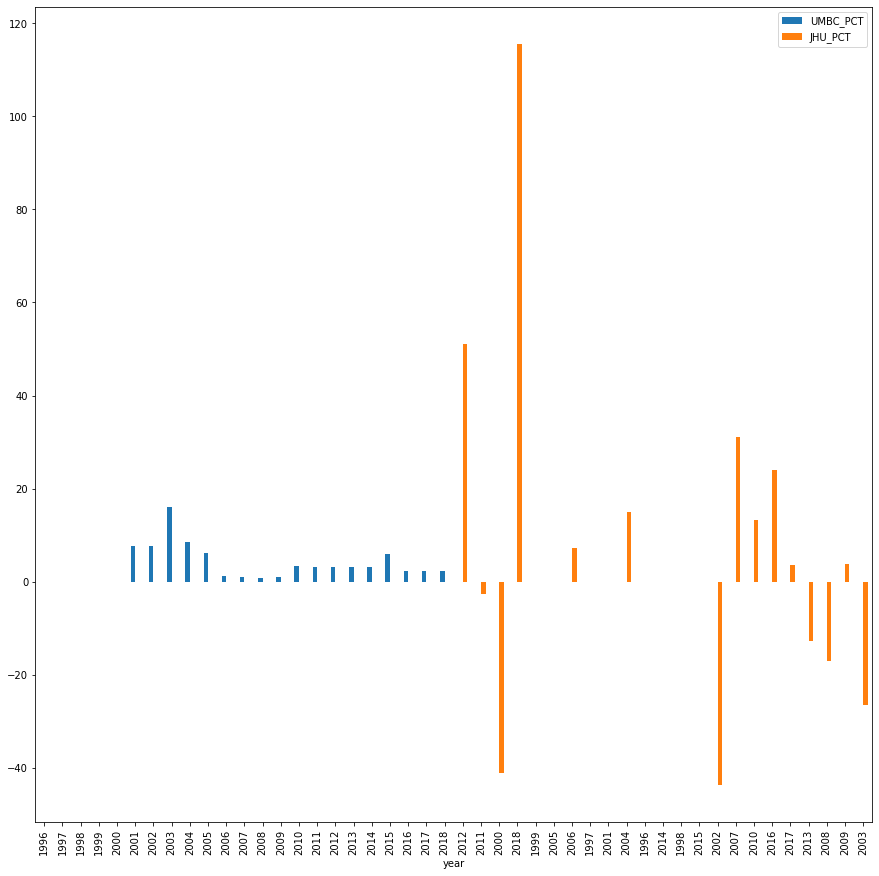

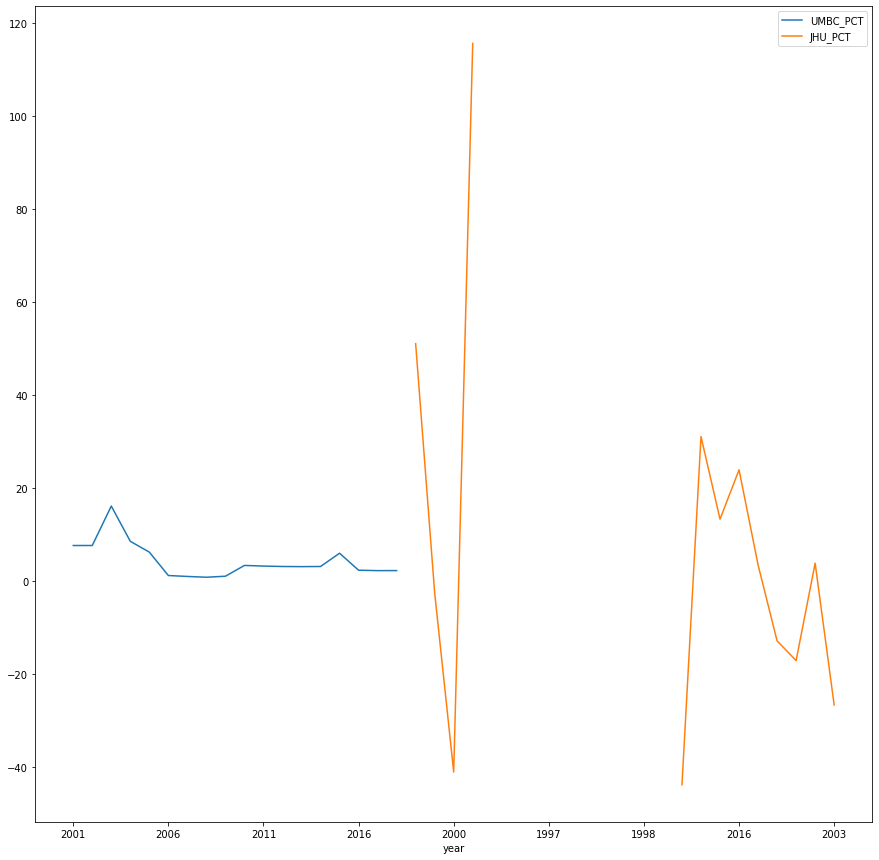

In [115]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

merge_data.plot.bar(x = 'year', y = ['UMBC_PCT', 'JHU_PCT'], figsize = (15, 15))

merge_data.plot.line(x = 'year', y = ['UMBC_PCT', 'JHU_PCT'], figsize = (15, 15))

# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

- From the BAR and LINE graph we depict that both UMBC as well as JOHN HOPKINS University tution fees has risen up every year.
- The highest percentage change was seen in year 2003.